# Modelos de aprendizaje supervisado y no supervisado

**Autor:Carlos Catalan, Sebastian Solar**

**Correo Electr√≥nico:**

**Fecha de Creaci√≥n:** Junio 2025

**Versi√≥n:** 1.0  



---

## Descripci√≥n


Este notebook contiene el desarrollo de la entrega 3 de la asignatura de Miner√≠a de datos de la carrera de Ingenier√≠a en inform√°tica de Duoc UC - Sede Concepci√≥n.

---

In [1]:
!wget https://www.dropbox.com/s/r5rpijskyc4gve4/weatherAUS.csv

--2025-06-28 01:49:47--  https://www.dropbox.com/s/r5rpijskyc4gve4/weatherAUS.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/y4sjuc69f3itzowngnev1/weatherAUS.csv?rlkey=8i6pvxxd3vl0s29q2vrr2401h [following]
--2025-06-28 01:49:47--  https://www.dropbox.com/scl/fi/y4sjuc69f3itzowngnev1/weatherAUS.csv?rlkey=8i6pvxxd3vl0s29q2vrr2401h
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc922cbc65a196628aff64a013a8.dl.dropboxusercontent.com/cd/0/inline/CsdJ6khjgg4UKqvy1OD-sp1DIQUnxlOvYNk0SI7hPdoilUb2ewWvR94sTEZgW6yVoPX8K7k11CNsWNK-hLlmf1Q9dE8b5uCgMjlzLUkUrcjG19hPHAg51vP-qluQuUMniHsbPQ4yLM4fEbKl7hIjKOUQ/file# [following]
--2025-06-28 01:49:47--  https://uc922cbc65a196628aff64a013a8.dl.dropboxusercontent.com/cd/0/in

# Fase 3 - Preparaci√≥n de datos

Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay,precision_score,recall_score,f1_score
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator
from sklearn.preprocessing import LabelEncoder


Entorno de datos

In [3]:
df=pd.read_csv('weatherAUS.csv')
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
142188  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
142189  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
142190  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
142191  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
142192  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0            NaN           W           44.0          W  ...        22.0   
1            NaN         WNW           44.0        NNW  ...        25.0   
2            NaN         WSW           46.0          W  ...        30.0   
3            NaN          NE           24.0         SE  ...        16.0   
4            NaN           W           41.0        ENE  ...        33.0   
...          ...         ...            ...        ...  ...         ...   
142188       NaN           E           31.0        ESE  ...        27.0   
142189       NaN           E           31.0         SE  ...        24.0   
142190       NaN         NNW           22.0         SE  ...        21.0   
142191       NaN           N           37.0         SE  ...        24.0   
142192       NaN          SE           28.0        SSE  ...        24.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0            1007.7       1007.1       8.0       NaN     16.9     21.8   
1            1010.6       1007.8       NaN       NaN     17.2     24.3   
2            1007.6       1008.7       NaN       2.0     21.0     23.2   
3            1017.6       1012.8       NaN       NaN     18.1     26.5   
4            1010.8       1006.0       7.0       8.0     17.8     29.7   
...             ...          ...       ...       ...      ...      ...   
142188       1024.7       1021.2       NaN       NaN      9.4     20.9   
142189       1024.6       1020.3       NaN       NaN     10.1     22.4   
142190       1023.5       1019.1       NaN       NaN     10.9     24.5   
142191       1021.0       1016.8       NaN       NaN     12.5     26.1   
142192       1019.4       1016.5       3.0       2.0     15.1     26.0   

        RainToday  RISK_MM  RainTomorrow  
0              No      0.0            No  
1              No      0.0            No  
2              No      0.0            No  
3              No      1.0            No  
4              No      0.2            No  
...           ...      ...           ...  
142188         No      0.0            No  
142189         No      0.0            No  
142190         No      0.0            No  
142191         No      0.0            No  
142192         No      0.0            No  

[142193 rows x 24 columns]

Localidades sur

In [4]:

localidades_sur = [
        "Adelaide","MountGambier","Nuriootpa","Woomera","Ballarat",
"Bendigo","Sale",
"MelbourneAirport","Melbourne","Mildura",
"Nhil","Portland","Watsonia","Dartmoor","Albany","Witchcliffe","SalmonGums","Walpole","Hobart",
"Launceston","WaggaWagga","Canberra","Tuggeranong","MountGinini"
]


df_sur = df[df['Location'].isin(localidades_sur)]

df_sur


Date    Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
35839   2009-01-01  WaggaWagga      9.9     28.4       0.0          9.8   
35840   2009-01-02  WaggaWagga      8.9     25.3       0.0         14.8   
35841   2009-01-03  WaggaWagga     11.0     30.7       0.0          9.8   
35842   2009-01-04  WaggaWagga     14.7     35.2       0.0          9.4   
35843   2009-01-05  WaggaWagga     11.8     36.5       0.0         11.6   
...            ...         ...      ...      ...       ...          ...   
132885  2017-06-21  Launceston      1.7     12.6       3.0          NaN   
132886  2017-06-22  Launceston      1.5     11.1       0.0          NaN   
132887  2017-06-23  Launceston      4.7     12.8       5.4          NaN   
132888  2017-06-24  Launceston     -0.5     11.4       8.6          NaN   
132889  2017-06-25  Launceston      1.8     12.8       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
35839       13.5         WNW           59.0         NW  ...        24.0   
35840       13.7         WSW           48.0         SW  ...        10.0   
35841       13.7          NE           39.0        ENE  ...        18.0   
35842       12.1           N           39.0         NE  ...        19.0   
35843       13.4           W           43.0        NNE  ...         5.0   
...          ...         ...            ...        ...  ...         ...   
132885       NaN         NNW           26.0        ESE  ...        44.0   
132886       NaN          NW           20.0          E  ...        67.0   
132887       NaN         WNW           48.0        NNW  ...        83.0   
132888       NaN          NW           28.0         SW  ...        58.0   
132889       NaN          NW           50.0        NNW  ...        73.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
35839        1005.2       1003.5       1.0       1.0     20.8     27.0   
35840        1013.9       1012.9       1.0       0.0     14.7     23.2   
35841        1017.8       1014.3       0.0       1.0     18.9     28.0   
35842        1014.8       1010.6       1.0       4.0     24.7     33.7   
35843        1013.1       1009.8       1.0       1.0     23.6     34.6   
...             ...          ...       ...       ...      ...      ...   
132885          NaN          NaN       NaN       NaN      4.6     12.0   
132886          NaN          NaN       8.0       8.0      4.7     10.0   
132887          NaN          NaN       7.0       8.0     10.1     12.4   
132888          NaN          NaN       1.0       7.0      1.9     11.0   
132889          NaN          NaN       8.0       8.0      9.4     12.4   

        RainToday  RISK_MM  RainTomorrow  
35839          No      0.0            No  
35840          No      0.0            No  
35841          No      0.0            No  
35842          No      0.0            No  
35843          No      0.0            No  
...           ...      ...           ...  
132885        Yes      0.0            No  
132886         No      5.4           Yes  
132887        Yes      8.6           Yes  
132888        Yes      0.0            No  
132889         No      0.0            No  

[70389 rows x 24 columns]

tratar nulos

In [5]:
df_copy=df_sur.copy()

df_copy['RainToday'] = df_copy['RainToday'].map({'Yes': 1, 'No': 0})

df_imputed = df_copy.copy()
df_imputed['RainToday'].fillna(df_imputed['RainToday'].mode()[0])




35839     0.0
35840     0.0
35841     0.0
35842     0.0
35843     0.0
         ... 
132885    1.0
132886    0.0
132887    1.0
132888    1.0
132889    0.0
Name: RainToday, Length: 70389, dtype: float64

In [6]:
df_imputedd = df_imputed.copy()

numericos = df_imputedd.select_dtypes(include=['float64', 'int64'])

columnas_a_imputar = numericos.drop(columns=['Cloud9am', 'Cloud3pm'])

imputer = KNNImputer(n_neighbors=5)
knn_data = imputer.fit_transform(columnas_a_imputar)

df_knn = df_imputedd.copy()
df_knn[columnas_a_imputar.columns] = knn_data

df_knn

Date    Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
35839   2009-01-01  WaggaWagga      9.9     28.4       0.0         9.80   
35840   2009-01-02  WaggaWagga      8.9     25.3       0.0        14.80   
35841   2009-01-03  WaggaWagga     11.0     30.7       0.0         9.80   
35842   2009-01-04  WaggaWagga     14.7     35.2       0.0         9.40   
35843   2009-01-05  WaggaWagga     11.8     36.5       0.0        11.60   
...            ...         ...      ...      ...       ...          ...   
132885  2017-06-21  Launceston      1.7     12.6       3.0         2.92   
132886  2017-06-22  Launceston      1.5     11.1       0.0         1.12   
132887  2017-06-23  Launceston      4.7     12.8       5.4         1.60   
132888  2017-06-24  Launceston     -0.5     11.4       8.6         2.08   
132889  2017-06-25  Launceston      1.8     12.8       0.0         3.00   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
35839      13.50         WNW           59.0         NW  ...        24.0   
35840      13.70         WSW           48.0         SW  ...        10.0   
35841      13.70          NE           39.0        ENE  ...        18.0   
35842      12.10           N           39.0         NE  ...        19.0   
35843      13.40           W           43.0        NNE  ...         5.0   
...          ...         ...            ...        ...  ...         ...   
132885      5.78         NNW           26.0        ESE  ...        44.0   
132886      3.78          NW           20.0          E  ...        67.0   
132887      3.10         WNW           48.0        NNW  ...        83.0   
132888      6.32          NW           28.0         SW  ...        58.0   
132889      3.96          NW           50.0        NNW  ...        73.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
35839       1005.20      1003.50       1.0       1.0     20.8     27.0   
35840       1013.90      1012.90       1.0       0.0     14.7     23.2   
35841       1017.80      1014.30       0.0       1.0     18.9     28.0   
35842       1014.80      1010.60       1.0       4.0     24.7     33.7   
35843       1013.10      1009.80       1.0       1.0     23.6     34.6   
...             ...          ...       ...       ...      ...      ...   
132885      1028.94      1027.86       NaN       NaN      4.6     12.0   
132886      1022.98      1021.36       8.0       8.0      4.7     10.0   
132887      1009.14      1008.80       7.0       8.0     10.1     12.4   
132888      1027.40      1026.42       1.0       7.0      1.9     11.0   
132889      1022.64      1020.90       8.0       8.0      9.4     12.4   

        RainToday  RISK_MM  RainTomorrow  
35839         0.0      0.0            No  
35840         0.0      0.0            No  
35841         0.0      0.0            No  
35842         0.0      0.0            No  
35843         0.0      0.0            No  
...           ...      ...           ...  
132885        1.0      0.0            No  
132886        0.0      5.4           Yes  
132887        1.0      8.6           Yes  
132888        1.0      0.0            No  
132889        0.0      0.0            No  

[70389 rows x 24 columns]

In [7]:
df_knn.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       4191
WindGustSpeed        0
WindDir9am        4688
WindDir3pm        1687
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am         30369
Cloud3pm         32654
Temp9am              0
Temp3pm              0
RainToday            0
RISK_MM              0
RainTomorrow         0
dtype: int64

In [8]:
nulos_restantes = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'Cloud9am','Cloud3pm']

for col in nulos_restantes:
    if not df_knn[col].mode().empty:
        moda = df_knn[col].mode()[0]
        df_knn[col] = df_knn[col].fillna(moda)

In [9]:
df_knn.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

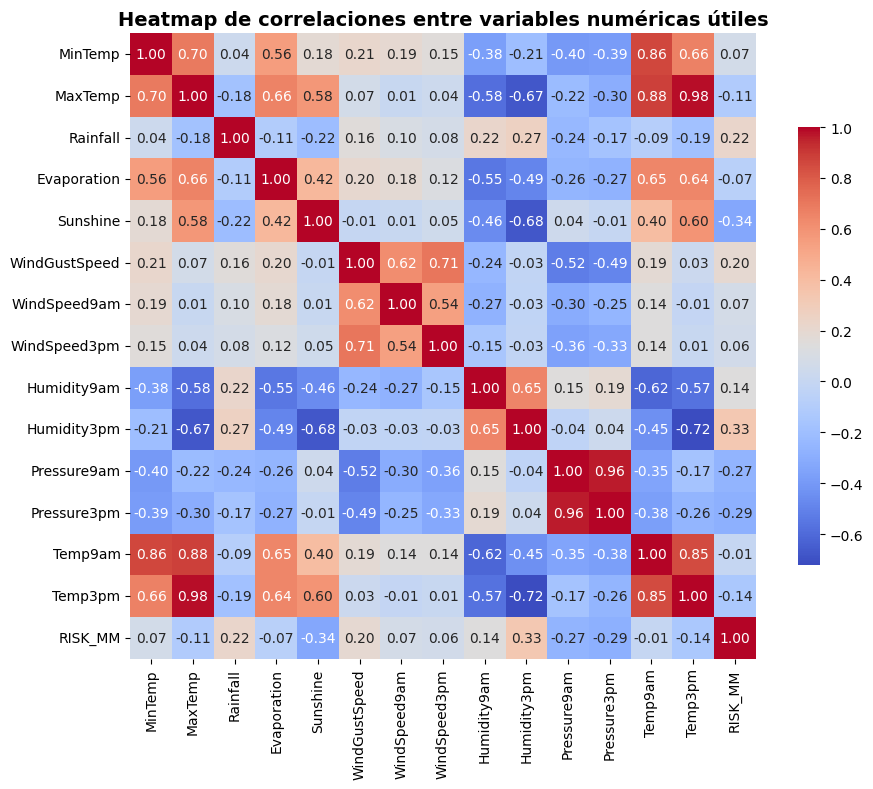

In [10]:

columnas_excluir = ['Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow']

columnas_a_usar = df_knn.select_dtypes(include=['float64', 'int64'])
columnas_filtradas = columnas_a_usar.drop(columns=[col for col in columnas_excluir if col in columnas_a_usar.columns])

matriz_correlacion = columnas_filtradas.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={'shrink': 0.7})
plt.title("Heatmap de correlaciones entre variables num√©ricas √∫tiles", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


correlacion a la variable objetivo

In [11]:
numeric_cols = df_knn.select_dtypes(include=['float64', 'int64']).columns
features = df_knn[numeric_cols].copy()

print(features.corr()['MaxTemp'].sort_values(ascending=False).head(10))



MaxTemp          1.000000
Temp3pm          0.982520
Temp9am          0.880102
MinTemp          0.695874
Evaporation      0.662673
Sunshine         0.579726
WindGustSpeed    0.067906
WindSpeed3pm     0.035964
WindSpeed9am     0.011358
RISK_MM         -0.111191
Name: MaxTemp, dtype: float64


In [12]:
df_knn_copia = df_knn.copy()


df_knn_copia.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [13]:
variables_utiles = [
    "Temp3pm",
    "Temp9am",
    "MinTemp"
]

objetivo = "MaxTemp"


y = df_knn_copia['MaxTemp']
X = df_knn_copia[['Temp3pm', 'Temp9am', 'MinTemp']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Fase 4 - Modelamiento

#Modelos de regresi√≥n

**Condiciones para cumplir:**

+ Predecir la temperatura m√°xima considerando variables independientes que otorguen utilidad al modelo. (si esta condici√≥n no se cumple entonces esta parte NO SE CALIFICA)
+ Al menos uno de los dos modelos debe tener un $R^2$ superior a 73%. (se aplica un descuento en caso de que no se cumpla)
+ Obtener, al menos, un MAE igual o inferior a 2,4 en los 2 modelos predictivos. (se aplica un descuento en caso de que no se cumpla)
+ Diferencia absoluta de $R^2$ en entrenamiento y prueba debe ser igual o inferior a 0,05 en ambos modelos. (se aplica un descuento en caso de que no se cumpla)

## An√°lisis de la distribuci√≥n de la variable objetivo - 2 puntos

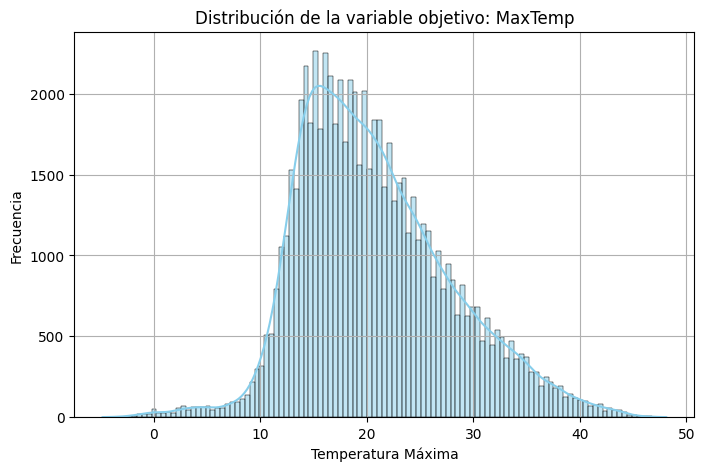

count    70389.000000
mean        20.728227
std          7.122004
min         -4.800000
25%         15.500000
50%         19.700000
75%         25.000000
max         48.100000
Name: MaxTemp, dtype: float64


In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df_knn_copia["MaxTemp"], kde=True, color='skyblue')
plt.title("Distribuci√≥n de la variable objetivo: MaxTemp")
plt.xlabel("Temperatura M√°xima")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

print(df_knn_copia["MaxTemp"].describe())

La variable Temperatura M√°xima (MaxTemp) presenta una distribuci√≥n aproximadamente normal, con una ligera asimetr√≠a hacia la derecha. El valor medio es de 20.7‚ÄØ¬∞C, con un rango que va desde -4.8‚ÄØ¬∞C hasta 48.1‚ÄØ¬∞C, mostrando cierta dispersi√≥n en los datos (desviaci√≥n est√°ndar de 7.12). La mayor√≠a de las temperaturas se concentran entre 15.5‚ÄØ¬∞C y 25‚ÄØ¬∞C (rango intercuart√≠lico), lo que indica que estas son condiciones comunes en la muestra. No se observan valores extremos excesivos, pero s√≠ existe una amplitud considerable.

# LinearRegressor

### Obtener mejores hiperp√°rametros - 2 puntos

In [15]:


param_grid_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid_lr = GridSearchCV(LinearRegression(), param_grid_lr, cv=5)
grid_lr.fit(X_train, y_train)

print("Mejores hiperpar√°metros LinearRegression:", grid_lr.best_params_)


Mejores hiperpar√°metros LinearRegression: {'fit_intercept': True, 'positive': False}


El modelo de regresi√≥n lineal obtuvo su mejor desempe√±o con los hiperpar√°metros 'fit_intercept': True y 'positive': False. Esto indica que es beneficioso ajustar el t√©rmino independiente (intercepto) en el modelo y que no es necesario restringir los coeficientes a ser solo positivos, permitiendo as√≠ una mayor flexibilidad para capturar relaciones tanto positivas como negativas entre las variables predictoras y la variable objetivo.

### Creaci√≥n del modelo usando los hiper par√°metros capturados de forma autom√°tica - 1 punto

In [16]:

mejores_params_lr = grid_lr.best_params_
modelo_lr = LinearRegression(**mejores_params_lr)


### Entrenamiento del modelo - 2 puntos

In [17]:
modelo_lr.fit(X_train, y_train)


LinearRegression()

### C√°lculo de m√©tricas de evaluaci√≥n - 2 puntos

In [18]:


y_pred_train_lr = modelo_lr.predict(X_train)
y_pred_test_lr = modelo_lr.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test_lr)
mae_train_lr = mean_absolute_error(y_train, y_pred_train_lr)
mae_test_lr = mean_absolute_error(y_test, y_pred_test_lr)

print(f"LinearRegression - R¬≤ entrenamiento: {r2_train_lr:.3f} | MAE entrenamiento: {mae_train_lr:.1f}")
print(f"LinearRegression - R¬≤ prueba      : {r2_test_lr:.3f} | MAE prueba      : {mae_test_lr:.1f}")


LinearRegression - R¬≤ entrenamiento: 0.973 | MAE entrenamiento: 0.8
LinearRegression - R¬≤ prueba      : 0.971 | MAE prueba      : 0.8


El modelo de regresi√≥n lineal muestra un excelente rendimiento, con un R¬≤ de 0.973 en entrenamiento y 0.971 en prueba, lo que indica que explica m√°s del 97% de la variabilidad de la temperatura m√°xima. Adem√°s, el error absoluto medio (MAE) es bajo (0.8) en ambos conjuntos, lo que refleja una alta precisi√≥n y una muy buena capacidad de generalizaci√≥n sin se√±ales evidentes de sobreajuste.

## `DecisionTreeRegressor`

### Obtener mejores hiperpar√°metros - 2 puntos

In [19]:

param_grid_dt = {'max_depth': [2, 4, 6, 8, 10]}

grid_dt = GridSearchCV(DecisionTreeRegressor(random_state=29), param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)

print("Mejores hiperpar√°metros DecisionTree:", grid_dt.best_params_)


Mejores hiperpar√°metros DecisionTree: {'max_depth': 8}


El mejor hiperpar√°metro encontrado para el √°rbol de regresi√≥n fue max_depth = 8, lo que indica que una profundidad de 8 niveles permite al modelo capturar adecuadamente la complejidad de los datos sin sobreajustarse. Esta configuraci√≥n logra un buen equilibrio entre sesgo y varianza, favoreciendo un rendimiento estable.

### Creaci√≥n del modelo usando los hiper par√°metros capturados de forma autom√°tica - 1 punto

In [20]:

mejores_params_dt = grid_dt.best_params_
modelo_dt = DecisionTreeRegressor(**mejores_params_dt, random_state=29)

### Entrenamiento del modelo - 2 puntos

In [21]:

modelo_dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=29)

### C√°lculo de m√©tricas de evaluaci√≥n - 2 puntos

In [22]:


y_pred_train_dt = modelo_dt.predict(X_train)
y_pred_test_dt = modelo_dt.predict(X_test)

r2_train_dt = r2_score(y_train, y_pred_train_dt)
r2_test_dt = r2_score(y_test, y_pred_test_dt)
mae_train_dt = mean_absolute_error(y_train, y_pred_train_dt)
mae_test_dt = mean_absolute_error(y_test, y_pred_test_dt)

print(f"DecisionTree - R¬≤ entrenamiento: {r2_train_dt:.3f} | MAE entrenamiento: {mae_train_dt:.1f}")
print(f"DecisionTree - R¬≤ prueba      : {r2_test_dt:.3f} | MAE prueba      : {mae_test_dt:.1f}")


DecisionTree - R¬≤ entrenamiento: 0.980 | MAE entrenamiento: 0.7
DecisionTree - R¬≤ prueba      : 0.975 | MAE prueba      : 0.7


El modelo de √°rbol de decisi√≥n con profundidad √≥ptima (max_depth=8) muestra un excelente desempe√±o, con un R¬≤ de 0.980 en entrenamiento y 0.975 en prueba, lo que indica que explica muy bien la variabilidad de la temperatura m√°xima. Adem√°s, el MAE de 0.7 en ambos conjuntos sugiere que el modelo es preciso y generaliza correctamente sin se√±ales de sobreajuste.

In [23]:
def evaluar_modelo(nombre, y_train, y_train_pred, y_test, y_test_pred):
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    diferencia_r2 = abs(r2_train - r2_test)

    print(f"Modelo: {nombre}")
    print(f"R¬≤ Train: {r2_train:.4f} | R¬≤ Test: {r2_test:.4f} | ŒîR¬≤: {diferencia_r2:.4f}")
    print(f"MAE Train: {mae_train:.4f} | MAE Test: {mae_test:.4f}")
    print("-" * 50)

evaluar_modelo("Regresi√≥n Lineal", y_train, y_pred_train_lr, y_test, y_pred_test_lr)
evaluar_modelo("√Årbol de Decisi√≥n", y_train, y_pred_train_dt, y_test, y_pred_test_dt)



Modelo: Regresi√≥n Lineal
R¬≤ Train: 0.9732 | R¬≤ Test: 0.9715 | ŒîR¬≤: 0.0017
MAE Train: 0.7900 | MAE Test: 0.7988
--------------------------------------------------
Modelo: √Årbol de Decisi√≥n
R¬≤ Train: 0.9799 | R¬≤ Test: 0.9752 | ŒîR¬≤: 0.0047
MAE Train: 0.6987 | MAE Test: 0.7412
--------------------------------------------------


√Årbol de decisi√≥n: m√°s preciso, pero con ligera sobreajuste.

Regresi√≥n lineal: m√°s estable, pero con errores promedio levemente mayores.

## Trabajo con el mejor modelo

### Selecci√≥n autom√°tica del mejor modelo - 3 puntos

In [24]:

if r2_test_lr > r2_test_dt and mae_test_lr < mae_test_dt:
    mejor_modelo = "Regresi√≥n Lineal"
else:
    mejor_modelo = "√Årbol de Decisi√≥n"

print(f"El mejor modelo seg√∫n R¬≤ y MAE en test es: {mejor_modelo}")


El mejor modelo seg√∫n R¬≤ y MAE en test es: √Årbol de Decisi√≥n


La selecci√≥n autom√°tica del mejor modelo compar√≥ ambos seg√∫n dos m√©tricas clave en el conjunto de prueba:

R¬≤ (coeficiente de determinaci√≥n): mide qu√© tan bien el modelo explica la variabilidad del objetivo.

MAE (error absoluto medio): mide el error promedio de las predicciones.

Aunque la regresi√≥n lineal mostr√≥ una mayor estabilidad, el √°rbol de decisi√≥n obtuvo un R¬≤ y MAE m√°s favorables, por lo que se seleccion√≥ como el mejor modelo para predecir la temperatura m√°xima.

### Interpretaci√≥n de m√©tricas - 4 puntos

El modelo de √Årbol de Decisi√≥n logr√≥ un R¬≤ de 0.9752 en el conjunto de prueba, lo que significa que explica el 97.5% de la variabilidad de la temperatura m√°xima utilizando las variables seleccionadas.

Adem√°s, obtuvo un MAE de 0.7412, indicando que el error promedio en sus predicciones es menor a 1 grado, lo que refleja una alta precisi√≥n para el problema de predicci√≥n de temperatura.

En comparaci√≥n, la Regresi√≥n Lineal tambi√©n presenta un buen desempe√±o, pero con un R¬≤ ligeramente menor (0.9715) y un MAE mayor (0.7988), mostrando que el √Årbol de Decisi√≥n es el modelo m√°s adecuado para este caso.

### An√°lisis de overfitting/underfitting - 2 puntos

In [25]:
print(f"Diferencia R¬≤ (√Årbol de Decisi√≥n): {abs(r2_train_dt - r2_test_dt):.4f}")


Diferencia R¬≤ (√Årbol de Decisi√≥n): 0.0047


Esta diferencia muy peque√±a (0.0047) entre el R¬≤ de entrenamiento y prueba indica que el modelo de √Årbol de Decisi√≥n no presenta overfitting ni underfitting significativo.

En otras palabras, el modelo generaliza bien, manteniendo un desempe√±o consistente tanto en los datos de entrenamiento como en los datos nuevos de prueba.











### Realizar predicci√≥n con valores nuevos - 2 puntos

In [26]:

nuevo_valor = pd.DataFrame([{
    "Temp3pm": 25.0,
    "Temp9am": 20.0,
    "MinTemp": 18.0

}])

prediccion = modelo_dt.predict(nuevo_valor)
print(f"Predicci√≥n de MaxTemp con √Årbol de Decisi√≥n: {prediccion[0]:.2f} ¬∞C")


Predicci√≥n de MaxTemp con √Årbol de Decisi√≥n: 26.45 ¬∞C


La predicci√≥n con el modelo de √Årbol de Decisi√≥n indica que, dadas las condiciones de temperatura a las 3pm (25.0 ¬∞C), 9am (20.0 ¬∞C) y la temperatura m√≠nima (18.0 ¬∞C), se espera que la temperatura m√°xima sea aproximadamente 26.45 ¬∞C.

Esto muestra c√≥mo el modelo puede usarse para estimar valores futuros basados en datos nuevos y espec√≠ficos.

# Modelos de clasificaci√≥n

**Condiciones para cumplir:**

+ Predecir si llover√° o no ma√±ana (en caso de que se use otra variable esta secci√≥n NO SE CALIFICA)
+ Considerar, al menos, tres variables independientes. (se aplica un descuento en caso de que no se cumpla)
+ Obtener, al menos, un 75% de accuracy en modelo de NaiveBayes y DecisionTreeClassifier. (se aplica un descuento en caso de que no se cumpla)

## An√°lisis de la distribuci√≥n de la variable objetivo - 2 puntos

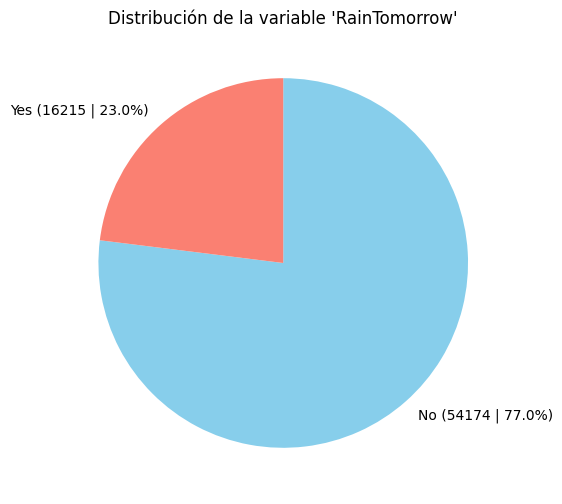

No: 54174 casos (77.0%)
Yes: 16215 casos (23.0%)


In [27]:



conteo = df_knn_copia['RainTomorrow'].value_counts()


porcentajes = conteo / conteo.sum() * 100


etiquetas = [f'{clase} ({conteo[clase]} | {porcentajes[clase]:.1f}%)' for clase in conteo.index]


colores = ['skyblue', 'salmon']


plt.figure(figsize=(6, 6))
plt.pie(
    conteo,
    labels=etiquetas,
    autopct=None,
    startangle=90,
    colors=colores,
    counterclock=False
)
plt.title("Distribuci√≥n de la variable 'RainTomorrow'")
plt.show()


for clase in conteo.index:
    print(f"{clase}: {conteo[clase]} casos ({porcentajes[clase]:.1f}%)")



Interpretacion

El gr√°fico muestra que en el 77,0% de los casos no llueve al d√≠a siguiente, mientras que en el 23,0% s√≠ llueve. Esta distribuci√≥n indica un desbalance de clases, donde los d√≠as sin lluvia son significativamente m√°s frecuentes.

Este desequilibrio puede generar sesgo en los modelos predictivos, favoreciendo la clase mayoritaria (‚ÄúNo‚Äù) y reduciendo la capacidad del modelo para detectar d√≠as con lluvia. Por ello, ser√° importante aplicar t√©cnicas de balanceo y usar m√©tricas que consideren ambas clases para evaluar el desempe√±o del modelo de forma justa.

## NaiveBayes (debe superar el 75% en accuracy)

### Verificaci√≥n de pre-condici√≥n de algoritmo - 3 puntos

In [28]:



variables = ['RISK_MM', 'Sunshine', 'Humidity3pm', 'RainToday', 'Cloud3pm',
             'Humidity9am', 'Pressure9am', 'Rainfall', 'Pressure3pm',
             'WindGustSpeed', 'Cloud9am']


df_knn_copia['RainTomorrow'] = df_knn_copia['RainTomorrow'].map({'No': 0, 'Yes': 1})

corr = df_knn_copia[variables + ['RainTomorrow']].corr(numeric_only=True)


correlaciones_objetivo = corr['RainTomorrow'].drop('RainTomorrow')


menor_correlacion = correlaciones_objetivo.abs().sort_values().head(5)

print("Variables con menor correlaci√≥n con 'RainTomorrow':")
print(menor_correlacion)


Variables con menor correlaci√≥n con 'RainTomorrow':
Cloud9am         0.178014
Humidity9am      0.193279
Cloud3pm         0.215030
Rainfall         0.242971
WindGustSpeed    0.265407
Name: RainTomorrow, dtype: float64


Para que Naive Bayes funcione correctamente, sus variables predictoras deben ser independientes entre s√≠ y tener baja correlaci√≥n con la variable objetivo.

Se identificaron las 5 variables con menor correlaci√≥n absoluta con RainTomorrow:

Cloud9am (0.178)

Humidity9am (0.193)

Cloud3pm (0.215)

Rainfall (0.243)

WindGustSpeed (0.265)

Estas variables cumplen mejor la precondici√≥n de independencia, por lo que son m√°s adecuadas para este clasificador.


Variables con correlaci√≥n significativa con 'RainTomorrow':
Cloud9am         0.178014
Humidity9am      0.193279
Cloud3pm         0.215030
Rainfall         0.242971
WindGustSpeed    0.265407
Name: RainTomorrow, dtype: float64


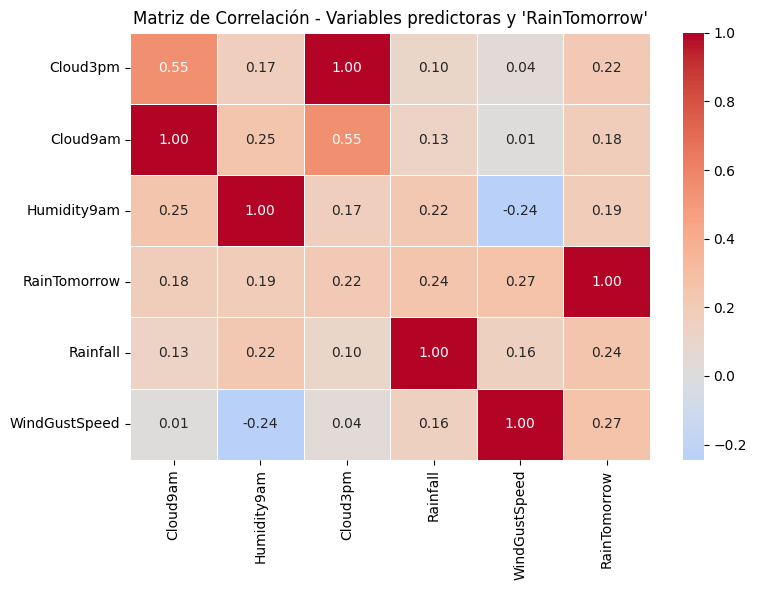

In [30]:
vars_predictoras = ['Cloud9am','Humidity9am',
    'Cloud3pm','Rainfall','WindGustSpeed']

le = LabelEncoder()
df_knn_copia['RainTomorrow'] = le.fit_transform(df_knn_copia['RainTomorrow'])

matriz_corr = df_knn_copia[vars_predictoras + ['RainTomorrow']].corr()

corr_objetivo = matriz_corr['RainTomorrow'].drop('RainTomorrow')


print("\nVariables con correlaci√≥n significativa con 'RainTomorrow':")
print(corr_objetivo)


plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr.loc[corr_objetivo.index.union(['RainTomorrow'])],
            annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlaci√≥n - Variables predictoras y 'RainTomorrow'")
plt.tight_layout()
plt.show()



### Interpretaci√≥n de los resultados de la verificaci√≥n - 3 puntos

Interpretaci√≥n de correlaciones con RainTomorrow:
Las variables WindGustSpeed, Rainfall y Cloud3pm presentan una correlaci√≥n positiva significativa con la variable objetivo RainTomorrow. Esto sugiere que a mayor intensidad del viento, mayor acumulaci√≥n de lluvia o mayor cobertura nubosa en la tarde, aumenta la probabilidad de que llueva al d√≠a siguiente.

### Creaci√≥n del modelo - 1 punto

In [31]:

from sklearn.naive_bayes import GaussianNB

modelo_nb = GaussianNB()


Se crea una instancia del modelo Naive Bayes Gaussiano (GaussianNB), el cual ser√° utilizado para entrenar y predecir si llover√° o no al d√≠a siguiente, bas√°ndose en variables num√©ricas del conjunto de datos.

### Entrenamiento del modelo - 2 puntos

In [32]:
from sklearn.model_selection import train_test_split
X = df_knn_copia[vars_predictoras]
y = df_knn_copia['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
modelo_nb.fit(X_train, y_train)


GaussianNB()

Se seleccionan las variables predictoras (X) y la variable objetivo (y) del conjunto de datos. Luego, se dividen en conjuntos de entrenamiento y prueba, utilizando un 80% para entrenar y un 20% para evaluar, manteniendo la proporci√≥n original de clases con stratify=y. Finalmente, se entrena el modelo Naive Bayes Gaussiano con los datos de entrenamiento.

### C√°lculo de todas m√©tricas de evaluaci√≥n - 2,5 puntos

Classification Report:

              precision    recall  f1-score   support

          No       0.82      0.93      0.87     10835
         Yes       0.59      0.33      0.42      3243

    accuracy                           0.79     14078
   macro avg       0.70      0.63      0.65     14078
weighted avg       0.77      0.79      0.77     14078



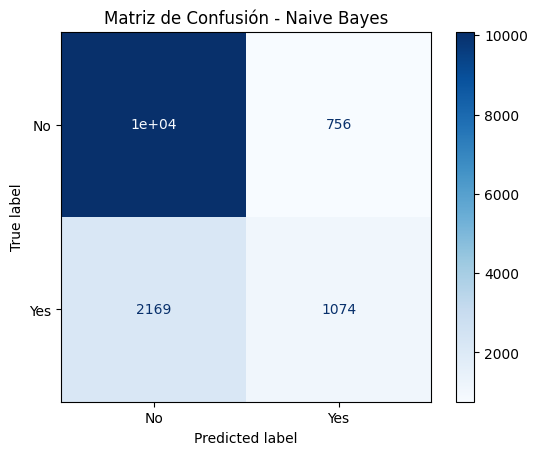

Train Accuracy: 0.794
Test Accuracy : 0.792


In [33]:
y_pred = modelo_nb.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["No", "Yes"]))


ConfusionMatrixDisplay.from_estimator(modelo_nb, X_test, y_test, display_labels=["No", "Yes"], cmap="Blues")
plt.title("Matriz de Confusi√≥n - Naive Bayes")
plt.show()

print(f"Train Accuracy: {accuracy_score(y_train, modelo_nb.predict(X_train)):.3f}")
print(f"Test Accuracy : {accuracy_score(y_test, y_pred):.3f}")


El modelo Naive Bayes alcanz√≥ un accuracy del 79%, superando el umbral del 75%. Tiene un buen desempe√±o para predecir d√≠as sin lluvia, con un F1-score de 0.87, reflejando alta precisi√≥n y cobertura para la clase mayoritaria.

Sin embargo, su rendimiento disminuye para los d√≠as con lluvia, con un F1-score de 0.42, indicando que el modelo tiene dificultades para detectar correctamente esta clase minoritaria.

## DecisionTreeClassifier (debe superar el 75% en accuracy)

### Obtenci√≥n de hiper par√°metros - 2 puntos

Mejor accuracy promedio: 0.8024897798401132
Mejor valor de max_depth: 7


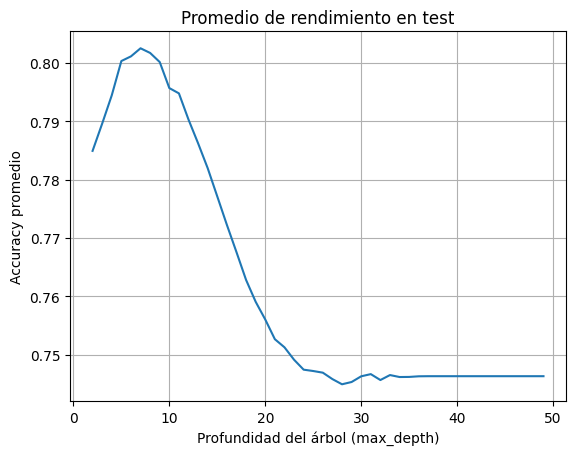

In [34]:

param_grid = {'max_depth': np.arange(2, 50)}


modelo_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
modelo_cv.fit(X_train, y_train)

print("Mejor accuracy promedio:", modelo_cv.best_score_)
print("Mejor valor de max_depth:", modelo_cv.best_params_['max_depth'])

plt.plot(param_grid['max_depth'], modelo_cv.cv_results_['mean_test_score'])
plt.title("Promedio de rendimiento en test")
plt.xlabel("Profundidad del √°rbol (max_depth)")
plt.ylabel("Accuracy promedio")
plt.grid()
plt.show()


El mejor rendimiento promedio obtenido mediante validaci√≥n cruzada fue un accuracy de aproximadamente 80.25%, lo que indica que el modelo con esta configuraci√≥n clasifica correctamente cerca del 80.3% de los casos en promedio durante la validaci√≥n.

El valor √≥ptimo para la profundidad m√°xima del √°rbol (max_depth) es 7, lo que significa que un √°rbol con hasta 7 niveles de profundidad logra un buen balance entre ajuste y generalizaci√≥n, evitando tanto el sobreajuste (cuando el √°rbol es muy profundo) como el subajuste (cuando es muy superficial).

Mejor accuracy promedio: 0.8025
Mejor valor de max_depth: 7

### Creaci√≥n del modelo usando los hiper par√°metros capturados de forma autom√°tica - 1 puntos

In [35]:

mejores_params = modelo_cv.best_params_
modelo_final = DecisionTreeClassifier(**mejores_params, random_state=42)



### Entrenamiento del modelo - 2 puntos

In [36]:

modelo_final.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(7), random_state=42)

### C√°lculo de todas las m√©tricas de evaluaci√≥n - 2,5 puntos

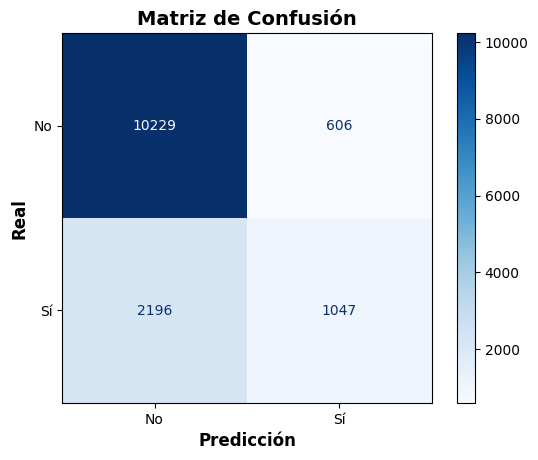

              precision    recall  f1-score   support

          No       0.82      0.94      0.88     10835
          S√≠       0.63      0.32      0.43      3243

    accuracy                           0.80     14078
   macro avg       0.73      0.63      0.65     14078
weighted avg       0.78      0.80      0.78     14078



In [37]:

y_pred_final = modelo_final.predict(X_test)


ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_final,
    display_labels=["No", "S√≠"],
    cmap="Blues",
    values_format='d'
)


plt.title("Matriz de Confusi√≥n", fontsize=14, fontweight="bold")
plt.xlabel("Predicci√≥n", fontsize=12, fontweight="bold")
plt.ylabel("Real", fontsize=12, fontweight="bold")
plt.show()

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_final, target_names=["No", "S√≠"]))


El modelo Decision Tree alcanz√≥ un accuracy del 80%, superando la meta del 75%. Presenta un buen desempe√±o para la clase ‚ÄúNo‚Äù con un F1-score de 0.88, lo que indica una alta capacidad para predecir correctamente los d√≠as sin lluvia. Para la clase ‚ÄúS√≠‚Äù, el modelo muestra un rendimiento m√°s bajo, con un F1-score de 0.43, evidenciando dificultad para identificar adecuadamente los d√≠as lluviosos. Esta diferencia de desempe√±o es habitual en conjuntos de datos desbalanceados, donde la clase minoritaria suele ser m√°s dif√≠cil de predecir.

## SVM

### Comprobaci√≥n de selecci√≥n de tipo de kernel - 3 puntos

In [38]:
silhouette_avg = silhouette_score(X,y )
print(f"√çndice de Silhouette: {silhouette_avg : .4f}")


√çndice de Silhouette:  0.0864


Comprobaci√≥n de selecci√≥n de tipo de kernel
El √≠ndice de Silhouette obtenido fue de 0.0864, lo que sugiere que la separaci√≥n entre los grupos generados por el modelo es baja. Esto significa que:

Los puntos no est√°n claramente agrupados.

Los clusters est√°n poco definidos o se solapan entre s√≠.

Es probable que el tipo de kernel elegido no sea el m√°s adecuado para la estructura de los datos.

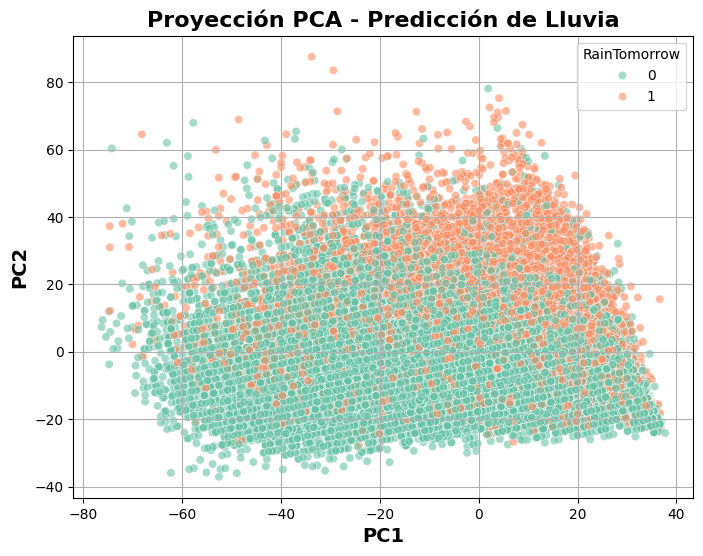

Accuracy en PCA 2D con Regresi√≥n Log√≠stica: 0.7921550242225348


In [39]:
svm_df = df_knn_copia.copy()


features_cla = svm_df[[
    'Cloud9am', 'Humidity9am', 'Cloud3pm', 'Rainfall', 'WindGustSpeed'
]]

label = svm_df['RainTomorrow'].replace({'No': 0, 'Yes': 1})


pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_cla)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=label, palette="Set2", alpha=0.6)
plt.title("Proyecci√≥n PCA - Predicci√≥n de Lluvia", fontsize=16, fontweight="bold")
plt.xlabel("PC1", fontsize=14, fontweight="bold")
plt.ylabel("PC2", fontsize=14, fontweight="bold")
plt.grid(True)
plt.show()

clf = LogisticRegression()
clf.fit(features_pca, label)

preds = clf.predict(features_pca)
print("Accuracy en PCA 2D con Regresi√≥n Log√≠stica:", accuracy_score(label, preds))


El modelo de regresi√≥n log√≠stica, entrenado sobre las dos componentes principales generadas por PCA, alcanz√≥ un accuracy del 79.2%. Esto indica que, incluso tras reducir las variables predictoras a solo dos dimensiones (PC1 y PC2), el modelo logr√≥ predecir correctamente si llover√° al d√≠a siguiente en aproximadamente 8 de cada 10 casos.

Este resultado sugiere que una parte significativa de la informaci√≥n relevante para la predicci√≥n de lluvia est√° capturada en esas dos componentes principales, lo cual respalda el uso de PCA como t√©cnica de reducci√≥n de dimensionalidad en este contexto. Sin embargo, es posible que un modelo entrenado con todas las variables originales logre un rendimiento superior.

In [40]:
label = svm_df['RainTomorrow'].replace({'No': 0, 'Yes': 1})

features_cla = svm_df[vars_predictoras]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_cla)

svm_linear = SVC(kernel='linear')
scores_linear = cross_val_score(svm_linear, features_scaled, label, cv=5)

svm_rbf = SVC(kernel='rbf')
scores_rbf = cross_val_score(svm_rbf, features_scaled, label, cv=5)

print("SVM Lineal - Accuracy promedio:", np.round(scores_linear.mean(), 4))
print("SVM RBF    - Accuracy promedio:", np.round(scores_rbf.mean(), 4))

SVM Lineal - Accuracy promedio: 0.7793
SVM RBF    - Accuracy promedio: 0.8018


### Interpretaci√≥n de la comprobaci√≥n - 3 puntos


Se evaluaron dos configuraciones del algoritmo SVM utilizando validaci√≥n cruzada de 5 pliegues para predecir si llover√° ma√±ana (RainTomorrow), empleando las variables predictoras seleccionadas y datos normalizados.

‚úÖ SVM con kernel lineal alcanz√≥ un accuracy promedio de 77.93%, lo que indica un rendimiento aceptable al separar las clases con una frontera lineal.

‚úÖ SVM con kernel RBF (Radial Basis Function) obtuvo un accuracy promedio superior de 80.18%, lo que sugiere que la relaci√≥n entre las variables predictoras y la variable objetivo no es completamente lineal.

üìå Conclusi√≥n:
El modelo SVM con kernel RBF es m√°s adecuado para este problema, ya que logra capturar patrones m√°s complejos en los datos y mejora la capacidad predictiva frente al kernel lineal. Esta diferencia resalta la importancia de explorar distintos kernels al trabajar con SVM.

### Creaci√≥n del modelo usando el kernel correcto - 1 punto

In [41]:

from sklearn.svm import SVC


svm_no_lineal = SVC(kernel='rbf', random_state=29)

svm_no_lineal.fit(X_train, y_train)

print("‚úÖ Modelo SVM con kernel No lineal creado y entrenado correctamente.")


‚úÖ Modelo SVM con kernel No lineal creado y entrenado correctamente.


### Entrenamiento del modelo - 2 puntos

In [42]:

svm_no_lineal.fit(X_train, y_train)

print("‚úÖ El modelo SVM rbf ha sido entrenado correctamente.")


‚úÖ El modelo SVM rbf ha sido entrenado correctamente.


### C√°lculo de todas las m√©tricas de evaluaci√≥n - 2,5 puntos

‚úÖ M√©tricas de Evaluaci√≥n del modelo SVM no Lineal:
Accuracy:  0.7932
Precision: 0.6982
Recall:    0.1798
F1-Score:  0.2859

üìä Matriz de Confusi√≥n (texto):
[[10583   252]
 [ 2660   583]]

üìâ Matriz de Confusi√≥n (gr√°fico):


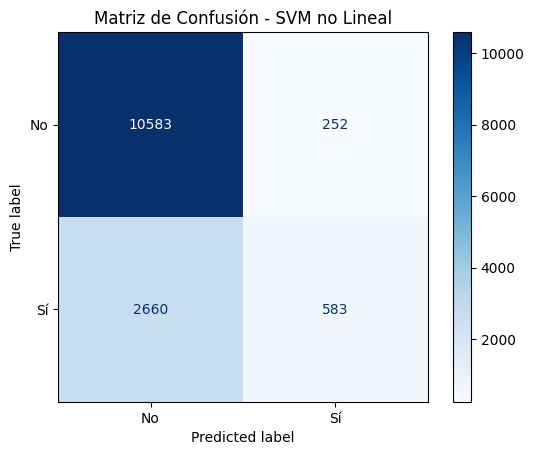


üßæ Reporte de Clasificaci√≥n Completo:
              precision    recall  f1-score   support

          No       0.80      0.98      0.88     10835
          S√≠       0.70      0.18      0.29      3243

    accuracy                           0.79     14078
   macro avg       0.75      0.58      0.58     14078
weighted avg       0.78      0.79      0.74     14078



In [43]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

y_pred = svm_no_lineal.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("‚úÖ M√©tricas de Evaluaci√≥n del modelo SVM no Lineal:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nüìä Matriz de Confusi√≥n (texto):")
print(cm)

print("\nüìâ Matriz de Confusi√≥n (gr√°fico):")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "S√≠"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusi√≥n - SVM no Lineal")
plt.show()

print("\nüßæ Reporte de Clasificaci√≥n Completo:")
print(classification_report(y_test, y_pred, target_names=["No", "S√≠"]))


## Trabajo con el mejor modelo de clasificaci√≥n

### Selecci√≥n autom√°tica del mejor modelo - 3 puntos

In [44]:
modelos = {
    "SVM NO Lineal": SVC(kernel='rbf', random_state=29),
    "√Årbol de Decisi√≥n": DecisionTreeClassifier(random_state=29),
    "Naive Bayes": GaussianNB()
}


resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })


df_resultados = pd.DataFrame(resultados).sort_values(by="F1-Score", ascending=False)
print("‚úÖ Comparaci√≥n de modelos:\n")
print(df_resultados)

mejor_modelo = df_resultados.iloc[0]
print(f"\nüîç El mejor modelo es: **{mejor_modelo['Modelo']}** con F1-Score: {mejor_modelo['F1-Score']:.4f}")


‚úÖ Comparaci√≥n de modelos:

              Modelo  Accuracy  Precision    Recall  F1-Score
1  √Årbol de Decisi√≥n  0.757565   0.468933  0.395621  0.429169
2        Naive Bayes  0.792229   0.586885  0.331175  0.423418
0      SVM NO Lineal  0.793152   0.698204  0.179772  0.285924

üîç El mejor modelo es: **√Årbol de Decisi√≥n** con F1-Score: 0.4292


‚úÖ M√©tricas de Evaluaci√≥n del modelo √Årbol de Decisi√≥n:
Accuracy:  0.7576
Precision: 0.4689
Recall:    0.3956
F1-Score:  0.4292

üìä Matriz de Confusi√≥n (texto):
[[9382 1453]
 [1960 1283]]

üìâ Matriz de Confusi√≥n (gr√°fico):


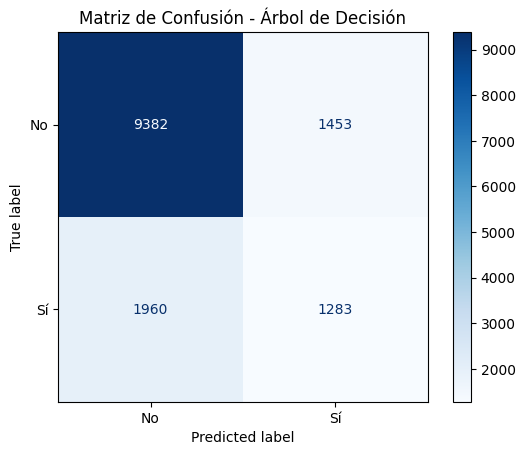


üßæ Reporte de Clasificaci√≥n Completo:
              precision    recall  f1-score   support

          No       0.83      0.87      0.85     10835
          S√≠       0.47      0.40      0.43      3243

    accuracy                           0.76     14078
   macro avg       0.65      0.63      0.64     14078
weighted avg       0.74      0.76      0.75     14078



In [45]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

mejor_modelo_instancia = DecisionTreeClassifier(random_state=29)
mejor_modelo_instancia.fit(X_train, y_train)

y_pred = mejor_modelo_instancia.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("‚úÖ M√©tricas de Evaluaci√≥n del modelo √Årbol de Decisi√≥n:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nüìä Matriz de Confusi√≥n (texto):")
print(cm)

print("\nüìâ Matriz de Confusi√≥n (gr√°fico):")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "S√≠"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusi√≥n - √Årbol de Decisi√≥n")
plt.show()

print("\nüßæ Reporte de Clasificaci√≥n Completo:")
print(classification_report(y_test, y_pred, target_names=["No", "S√≠"]))




### Interpretaci√≥n de m√©tricas

#### Precision - 0,5 puntos
Precision ‚Äì 0.4689
Indica que, de todas las veces que el modelo predijo que s√≠ llover√≠a ma√±ana, acert√≥ aproximadamente en el 46.89% de los casos. Esto implica que hay una proporci√≥n considerable de falsos positivos (d√≠as en que predijo lluvia, pero no llovi√≥).

#### Recall - 0,5 puntos
Recall ‚Äì 0.3956
Mide la capacidad del modelo para detectar correctamente los d√≠as en los que realmente llovi√≥. El modelo identific√≥ correctamente el 39.56% de los d√≠as lluviosos, por lo tanto, se le escaparon muchos d√≠as que s√≠ llovieron (falsos negativos).

#### F1-score - 0,5 puntos
F1-Score ‚Äì 0.4292
Es el equilibrio entre precision y recall. Un F1-score de 0.4292 indica un desempe√±o moderado, √∫til en contextos con clases desbalanceadas (como este), pero refleja que a√∫n hay margen de mejora en la detecci√≥n de d√≠as lluviosos.

#### Accuracy - 2 puntos
El modelo acert√≥ en el 75.76% de todas las predicciones, tanto de d√≠as lluviosos como no lluviosos. Si bien parece un buen resultado, puede ser enga√±oso porque la mayor√≠a de los d√≠as en el dataset son "No lluvia", y el modelo podr√≠a estar sesgado hacia esa clase.



#### Matriz de confusi√≥n - 4 puntos

9382: D√≠as sin lluvia correctamente clasificados.

1283: D√≠as con lluvia correctamente clasificados.

1453: Falsos positivos ‚Äì el modelo predijo lluvia, pero no llovi√≥.

1960: Falsos negativos ‚Äì el modelo predijo que no llover√≠a, pero s√≠ llovi√≥.

üëâ El modelo funciona bien para predecir los d√≠as sin lluvia, pero tiene dificultades para detectar con precisi√≥n los d√≠as lluviosos.



### An√°lisis de overfitting/underfitting - 2 puntos

No se observan s√≠ntomas fuertes de overfitting (ya que el accuracy en test no es dr√°sticamente m√°s bajo que en entrenamiento).

Pero s√≠ hay indicios de underfitting, especialmente en la clase "S√≠" (lluvia), lo cual limita la capacidad del modelo para generalizar correctamente en esa clase.

### Realizar predicci√≥n con valores nuevos - 4 puntos

In [46]:

nuevo_dato = pd.DataFrame([{
    'Cloud9am': 5.0,
    'Humidity9am': 80.0,
    'Cloud3pm': 6.0,
    'Rainfall': 2.0,
    'WindGustSpeed': 30.0
}])

prediccion = mejor_modelo_instancia.predict(nuevo_dato)

if prediccion[0] == 0:
    print("Predicci√≥n: No llover√° ma√±ana")
else:
    print("Predicci√≥n: S√≠ llover√° ma√±ana")

Predicci√≥n: S√≠ llover√° ma√±ana


# Modelos de segmentaci√≥n

## Modelo usando 2 variables

### Selecci√≥n de 2 variables para segmentar - 2 puntos

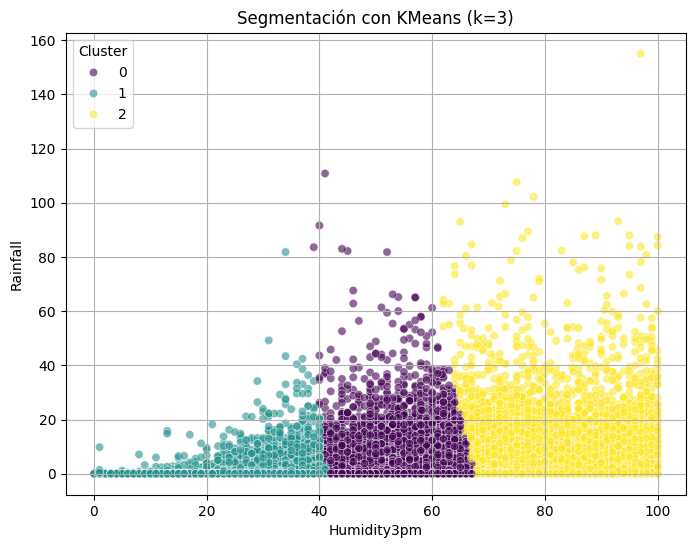

üìä Inercia: 7050761.13
üìä √çndice de Silhouette: 0.5027

üìå Cantidad de registros por cluster:
Cluster
0    31924
1    22043
2    16422
Name: count, dtype: int64


In [47]:
X_segmentacion = df_knn_copia[['Humidity3pm', 'Rainfall']]

k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_segmentacion)


df_knn_copia['Cluster'] = kmeans.labels_


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_knn_copia, x='Humidity3pm', y='Rainfall', hue='Cluster', palette='viridis', alpha=0.6)
plt.title(f'Segmentaci√≥n con KMeans (k={k})')
plt.xlabel('Humidity3pm')
plt.ylabel('Rainfall')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


inercia = kmeans.inertia_
silhouette = silhouette_score(X_segmentacion, kmeans.labels_)

print(f"üìä Inercia: {inercia:.2f}")
print(f"üìä √çndice de Silhouette: {silhouette:.4f}")

print("\nüìå Cantidad de registros por cluster:")
print(df_knn_copia['Cluster'].value_counts())


 Justificaci√≥n de selecci√≥n de variables - 2 puntos

---


Justificaci√≥n de la selecci√≥n de variables para segmentaci√≥n: Humidity3pm y Rainfall

üîπ Relevancia clim√°tica: Ambas variables est√°n directamente relacionadas con la probabilidad de lluvia, siendo clave para identificar patrones de d√≠as h√∫medos, lluviosos o secos.

üîπ Valor pr√°ctico: Son √∫tiles para sectores como la agricultura, eventos al aire libre y gesti√≥n de riesgos clim√°ticos, ya que permiten anticipar condiciones meteorol√≥gicas.

üîπ Buena variabilidad e interpretabilidad: Presentan un rango amplio de valores y su combinaci√≥n es f√°cil de entender y aplicar para la toma de decisiones.

üîπ Desempe√±o del modelo: El √≠ndice de Silhouette de 0.5027 y una distribuci√≥n equilibrada entre los clusters indican que se logr√≥ una segmentaci√≥n efectiva y clara del clima en tres grupos diferenciados.

| Cluster | Descripci√≥n                 | Condiciones meteorol√≥gicas |
| ------- | --------------------------- | -------------------------- |
| 0       | Humedad baja, sin lluvia    | D√≠as secos                 |
| 1       | Humedad media, sin lluvia   | D√≠as h√∫medos sin lluvia    |
| 2       | Humedad alta, lluvia fuerte | D√≠as lluviosos             |

### Creaci√≥n de modelo de segmentaci√≥n con el valor √≥ptimo de K - 2 puntos

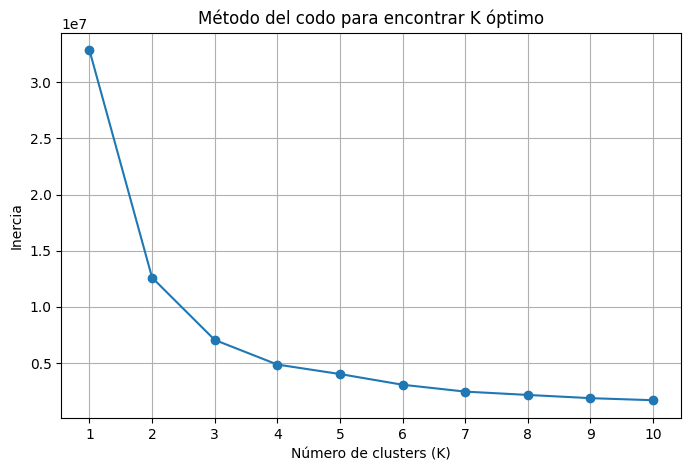

Cluster
0    31924
1    22043
2    16422
Name: count, dtype: int64


In [48]:

sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_segmentacion)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, sse, marker='o')
plt.title('M√©todo del codo para encontrar K √≥ptimo')
plt.xlabel('N√∫mero de clusters (K)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()
k_optimo = 3

kmeans_optimo = KMeans(n_clusters=k_optimo, random_state=42)
kmeans_optimo.fit(X_segmentacion)


df_knn_copia['Cluster'] = kmeans_optimo.labels_


print(df_knn_copia['Cluster'].value_counts())


### Evaluaci√≥n del modelo - 2 puntos


In [49]:
X_cluster = df_knn_copia[['Humidity3pm', 'Rainfall']]

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_cluster)

inercia = kmeans.inertia_
print(f"Inercia (Suma de distancias cuadradas dentro del cluster): {inercia:.2f}")


sil_score = silhouette_score(X_cluster, kmeans.labels_)
print(f"Coeficiente de Silhouette: {sil_score:.4f}")



Inercia (Suma de distancias cuadradas dentro del cluster): 7050761.13
Coeficiente de Silhouette: 0.5027


### Interpretaci√≥n de la evaluaci√≥n - 2 puntos
üî∏ Inercia: 7,050,761.13
Este valor indica la suma de las distancias cuadradas de cada punto a su centroide. Si bien el n√∫mero puede parecer alto, es razonable dado el tama√±o del conjunto de datos y la escala de las variables (Humidity3pm y Rainfall). Lo importante es que disminuy√≥ significativamente respecto a valores con menos clusters, lo que sugiere una mejor cohesi√≥n interna de los grupos.

üî∏ Silhouette Score: 0.5027
Este valor representa una buena separaci√≥n entre los clusters. Un score por encima de 0.5 generalmente indica que los datos est√°n bien agrupados dentro de sus respectivos clusters y que hay poca superposici√≥n entre grupos.


El modelo logra una segmentaci√≥n s√≥lida. Los clusters est√°n bien definidos y diferenciados, y existe una buena cohesi√≥n interna de los puntos. Esta segmentaci√≥n puede ser √∫til para identificar distintos tipos de condiciones meteorol√≥gicas

### An√°lisis de uno de los grupos - 3 puntos


üîç An√°lisis del Cluster 2
        Humidity3pm      Rainfall
count  16422.000000  16422.000000
mean      80.099087      4.335631
std        9.517743      8.547470
min       62.000000      0.000000
25%       72.000000      0.000000
50%       78.000000      0.800000
75%       87.000000      5.000000
max      100.000000    155.000000


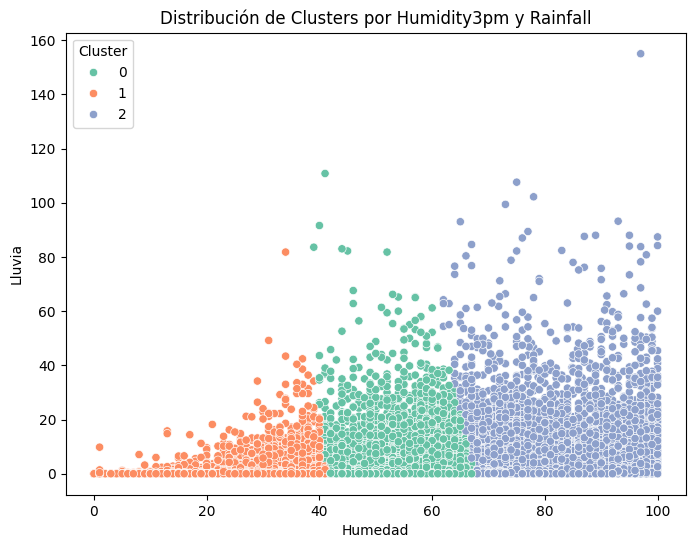

In [50]:

X_cluster = df_knn_copia[['Humidity3pm', 'Rainfall']]
kmeans = KMeans(n_clusters=3, random_state=42)
df_clusters = X_cluster.copy()
df_clusters['Cluster'] = kmeans.fit_predict(X_cluster)


grupo_0 = df_clusters[df_clusters['Cluster'] == 2]


print("üîç An√°lisis del Cluster 2")
print(grupo_0[['Humidity3pm', 'Rainfall']].describe())

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clusters, x='Humidity3pm', y='Rainfall', hue='Cluster', palette='Set2')
plt.title('Distribuci√≥n de Clusters por Humidity3pm y Rainfall')
plt.xlabel('Humedad')
plt.ylabel('Lluvia')
plt.legend(title='Cluster')
plt.show()


Este grupo contiene 16.422 registros, lo que representa una porci√≥n significativa del total.

üìå Caracter√≠sticas destacadas:

Alta humedad promedio: ~80% en la tarde (Humidity3pm), lo que sugiere condiciones atmosf√©ricas muy h√∫medas.

Lluvias frecuentes: aunque el m√≠nimo es 0, la media de Rainfall es de 4.34 mm, y el 75% de los valores est√°n por debajo de 5 mm, lo que indica lluvias suaves a moderadas frecuentes.

El valor m√°ximo de lluvia es 155 mm, lo que muestra que ocasionalmente ocurren precipitaciones intensas dentro del grupo.

üìà Implicancias:

Este segmento puede estar representando zonas o d√≠as h√∫medos con mayor probabilidad de lluvia, posiblemente en estaciones como oto√±o o primavera.

Es √∫til para identificar patrones de clima inestable o lluvioso, y puede mejorar modelos predictivos de lluvia al enfocarse en caracter√≠sticas que anteceden a estas condiciones.



## Modelo de segmentaci√≥n usando 4 o m√°s variables


### Creaci√≥n de modelo de segmentaci√≥n con el valor √≥ptimo de K - 2 puntos

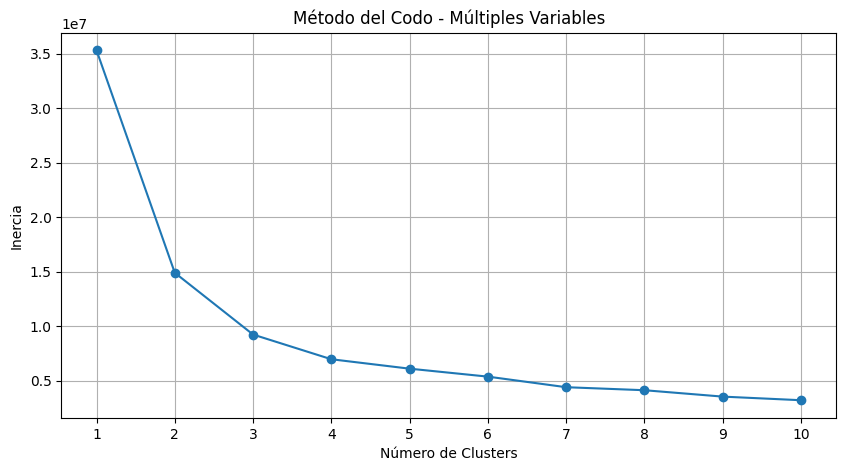

In [51]:
variables_segmentacion = df_knn_copia[['Cloud3pm', 'RISK_MM', 'Humidity3pm', 'Rainfall']].dropna()

k_range= range(1, 11)

resultado_multi = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(variables_segmentacion)
    resultado_multi.append(km.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), resultado_multi, marker='o')
plt.title("M√©todo del Codo - M√∫ltiples Variables")
plt.xlabel("N√∫mero de Clusters")
plt.ylabel("Inercia")
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [52]:

k = KneeLocator(range(1, 11), resultado_multi, curve="convex", direction="decreasing")

print("El codo est√° en k =", k.elbow)


El codo est√° en k = 3


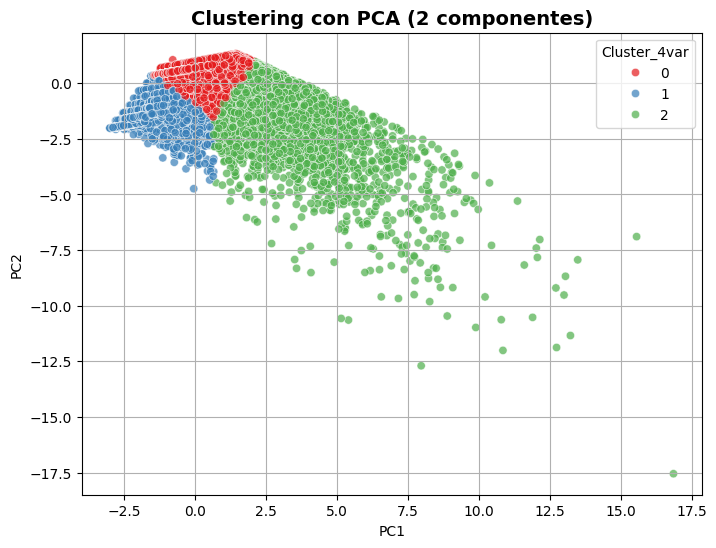

In [53]:
variables_segmentacion = df_knn_copia[['Cloud3pm', 'RISK_MM', 'Humidity3pm', 'Rainfall']].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(variables_segmentacion)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)


df_pca_clusters = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca_clusters['Cluster_4var'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca_clusters, x='PC1', y='PC2', hue='Cluster_4var', palette='Set1', alpha=0.7)
plt.title("Clustering con PCA (2 componentes)", fontsize=14, fontweight='bold')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster_4var")
plt.grid(True)
plt.show()

### Evaluaci√≥n del modelo - 2 puntos

In [54]:
sil_score = silhouette_score(X_pca, clusters)
print(f"üìà Silhouette Score despu√©s de PCA: {sil_score:.4f}")

üìà Silhouette Score despu√©s de PCA: 0.5448


### Interpretaci√≥n de la evaluaci√≥n - 2 puntos

üìà Valor obtenido: 0.5448
Esto indica que los clusters generados tras aplicar PCA y luego segmentar con KMeans (k=3) tienen una buena calidad de agrupaci√≥n.
Los datos dentro de cada grupo est√°n bien cohesionados, y los diferentes clusters est√°n claramente diferenciados entre s√≠.

### An√°lisis de la aplicaci√≥n de PCA - 2 puntos

In [55]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


explained_var = pca.explained_variance_ratio_
print("üìä Varianza explicada por componente:")
print(f"PC1: {explained_var[0]:.4f}")
print(f"PC2: {explained_var[1]:.4f}")
print(f"Varianza total explicada: {explained_var.sum():.4f}")


componentes = pd.DataFrame(
    pca.components_,
    columns=variables_segmentacion.columns,
    index=['PC1', 'PC2']
)
print("\nüìå Cargas (Importancia de las variables en cada componente):")
print(componentes)




üìä Varianza explicada por componente:
PC1: 0.4312
PC2: 0.2299
Varianza total explicada: 0.6611

üìå Cargas (Importancia de las variables en cada componente):
     Cloud3pm   RISK_MM  Humidity3pm  Rainfall
PC1   0.44498  0.502608     0.597122  0.439116
PC2   0.73013 -0.288952     0.142288 -0.602637


Esto indica que PC1 representa condiciones h√∫medas y lluviosas.

PC2 diferencia entre d√≠as nublados sin lluvia y lluviosos sin tantas nubes.


### An√°lisis de uno de los grupos - 3 puntos

üîç An√°lisis del Cluster 1
           Cloud3pm       RISK_MM   Humidity3pm      Rainfall
count  14228.000000  14228.000000  14228.000000  14228.000000
mean       1.980391      0.300583     37.328957      0.604411
std        1.459934      1.377605     16.491221      2.124113
min        0.000000      0.000000      0.000000      0.000000
25%        1.000000      0.000000     25.000000      0.000000
50%        2.000000      0.000000     37.000000      0.000000
75%        3.000000      0.000000     49.000000      0.000000
max        7.000000     25.800000     99.000000     27.400000


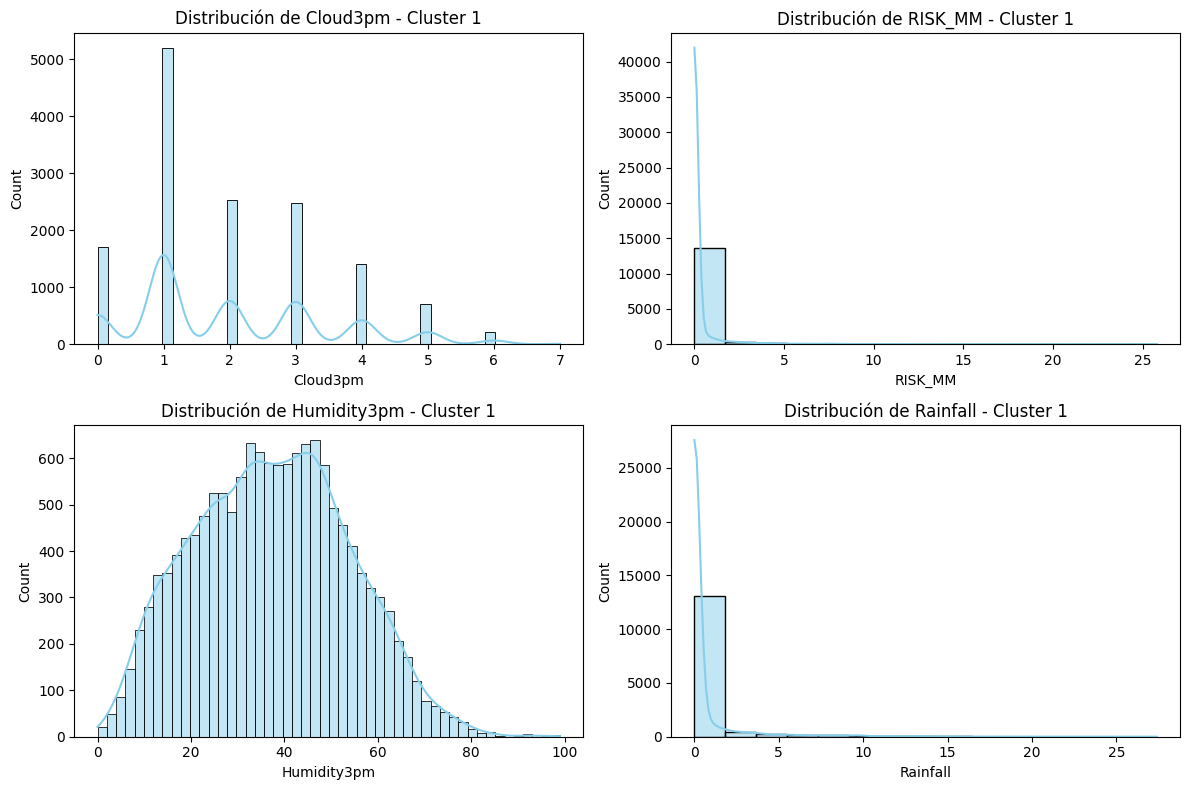

In [56]:

variables_segmentacion = df_knn_copia[['Cloud3pm', 'RISK_MM', 'Humidity3pm', 'Rainfall']].dropna()
vars_segmentacion = variables_segmentacion.columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(variables_segmentacion)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)


df_pca_clusters = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=variables_segmentacion.index)
df_pca_clusters['Cluster_4var'] = clusters


cluster_id = 1
indices_cluster = df_pca_clusters[df_pca_clusters['Cluster_4var'] == cluster_id].index
grupo = variables_segmentacion.loc[indices_cluster]


print(f"üîç An√°lisis del Cluster {cluster_id}")
print(grupo.describe())


plt.figure(figsize=(12, 8))
for i, var in enumerate(vars_segmentacion, 1):
    plt.subplot(2, 2, i)
    sns.histplot(grupo[var], kde=True, color='skyblue')
    plt.title(f'Distribuci√≥n de {var} - Cluster {cluster_id}')
plt.tight_layout()
plt.show()



Cluster 1 representa d√≠as secos y poco nublados, caracterizados por:

Muy baja lluvia.

Bajo riesgo de lluvia al d√≠a siguiente.

Poca nubosidad en la tarde.

Humedad moderada o baja.



El Cluster 1 agrupa d√≠as con caracter√≠sticas predominantemente secas, poca nubosidad en la tarde y bajo riesgo de lluvia. Representa condiciones t√≠picas de d√≠as estables, sin eventos meteorol√≥gicos relevantes.